Importing the libraries and packages needed

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, pearsonr
from ucimlrepo import fetch_ucirepo

Fetching the data set as per the website given code

In [74]:
# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets





Concatentaing the data into a singular pandas data frame

In [75]:
df=pd.concat([X, y], axis=1)
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Through this I found out the columns in the data and the data types. I found that mean age we are observing in this data set is 38 years old. I also found out that income is type object. Then next I am going to check for null values and remove the rows that contain null values because it is less than 2% of the entire data set so it would not impact my data set a lot

In [76]:
#checking for null values
df.isnull().sum()

,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


In [77]:
#dropping rows with missing values because it makes up less than 2% of data set
df.dropna(subset=['workclass', 'occupation', 'native-country'], inplace=True)
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


Checking different types of values income might have and encoding it to be either 1 or 0

In [78]:
df.head()
print(df['income'].unique())
# Remove periods at the end of the strings
df['income'] = df['income'].str.replace('.', '', regex=False)

# Check unique values again to confirm the cleaning worked
print(df['income'].unique())

# Map income to numeric values (0 for <=50K, 1 for >50K)
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})



['<=50K' '>50K' '<=50K.' '>50K.']
['<=50K' '>50K']


In [52]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


# Visualisation

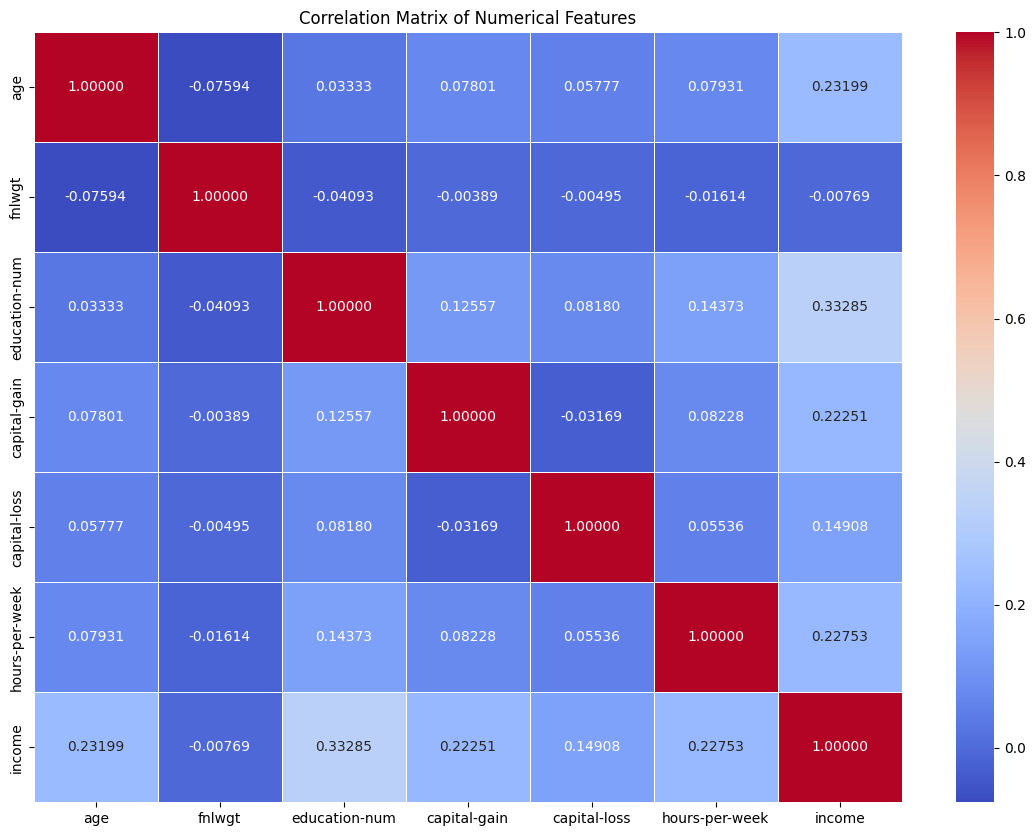

In [79]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.5f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

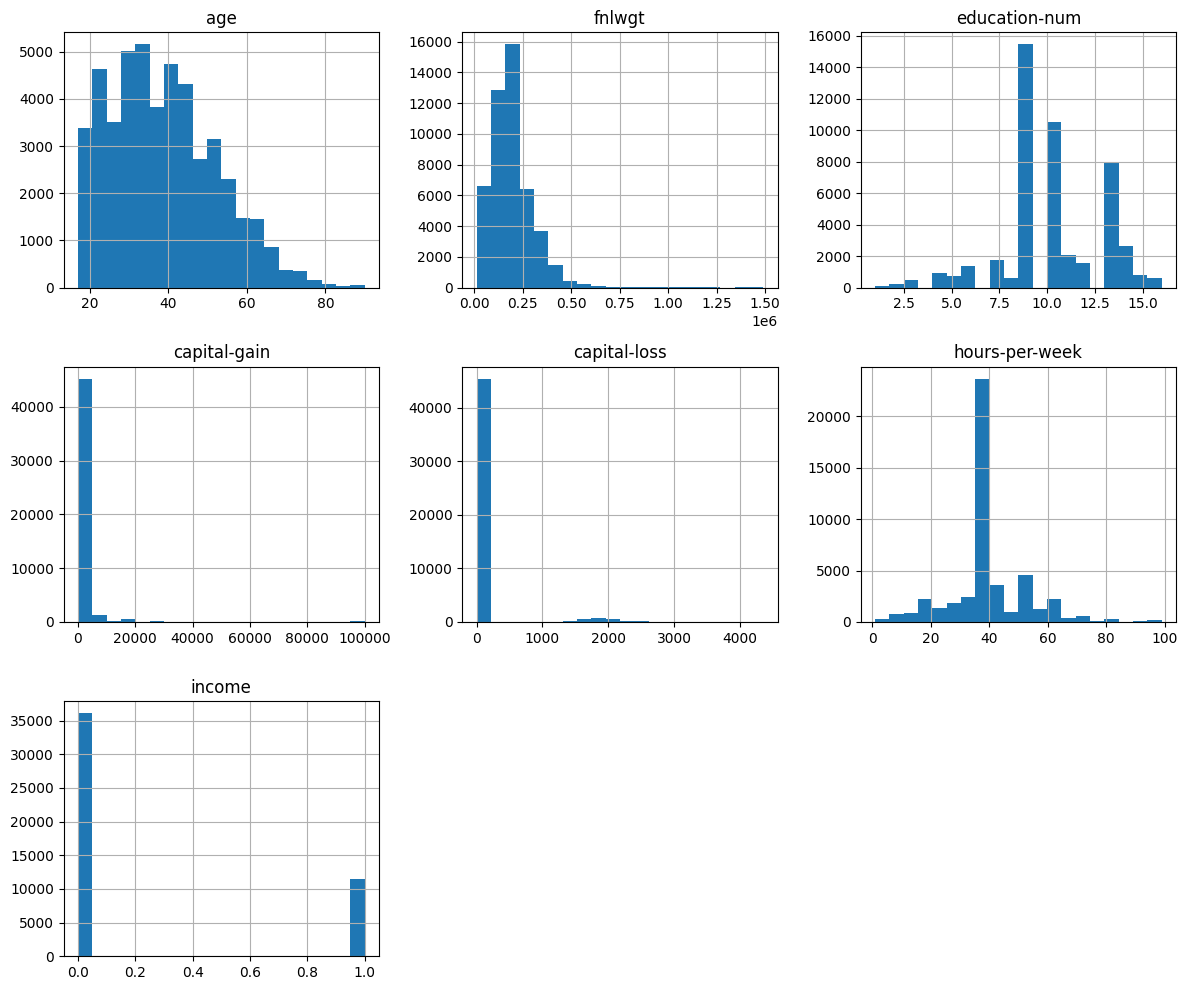

In [80]:
df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

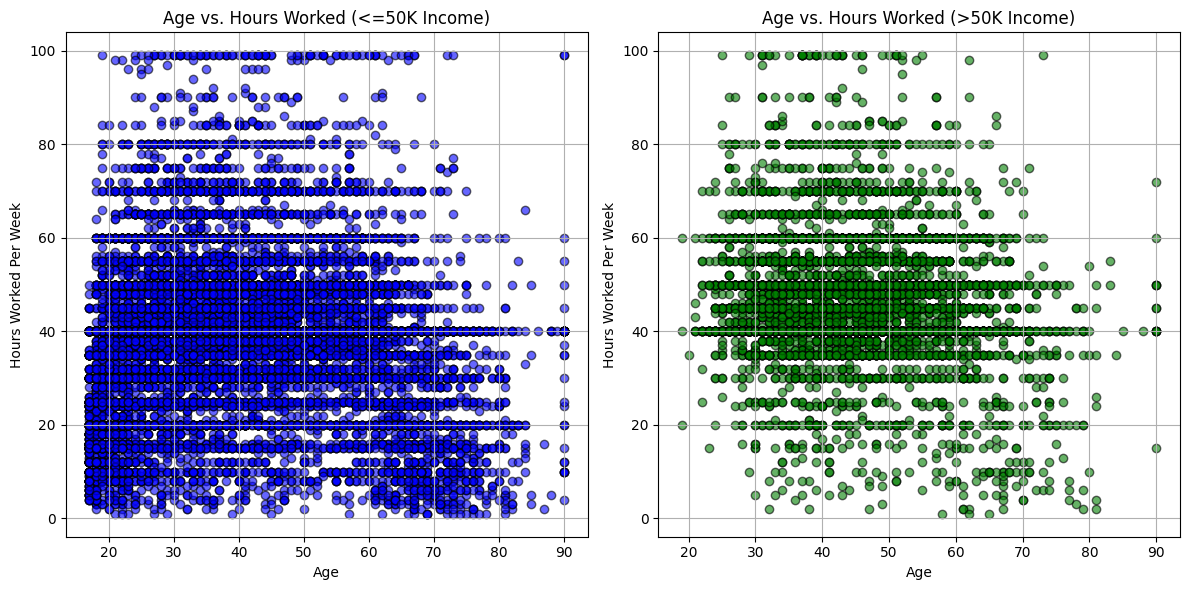

In [81]:
income_low = df[df['income'] == 0]  # People earning <=50K
income_high = df[df['income'] == 1]  # People earning >50K

# Create a figure with two subplots (1 row, 2 columns)
plt.figure(figsize=(12, 6))

# Scatter plot for individuals earning <=50K
plt.subplot(1, 2, 1)
plt.scatter(income_low['age'], income_low['hours-per-week'], alpha=0.6,3 color='blue', edgecolor='black')
plt.title('Age vs. Hours Worked (<=50K Income)')
plt.xlabel('Age')
plt.ylabel('Hours Worked Per Week')
plt.grid()

# Scatter plot for individuals earning >50K
plt.subplot(1, 2, 2)
plt.scatter(income_high['age'], income_high['hours-per-week'], alpha=0.6, color='green', edgecolor='black')
plt.title('Age vs. Hours Worked (>50K Income)')
plt.xlabel('Age')
plt.ylabel('Hours Worked Per Week')
plt.grid()

# Adjust layout and display the figure
plt.tight_layout()
plt.show()


In [62]:
df["sex"].unique()

array(['Male', 'Female'], dtype=object)

<ipython-input-82-5dafb4ebf37a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sex', palette={'Male': 'blue', 'Female': 'red'})


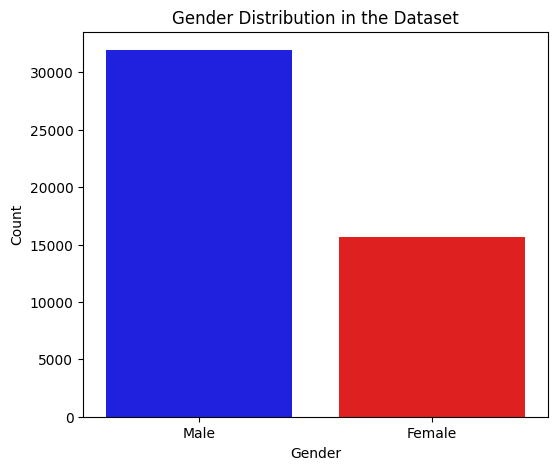

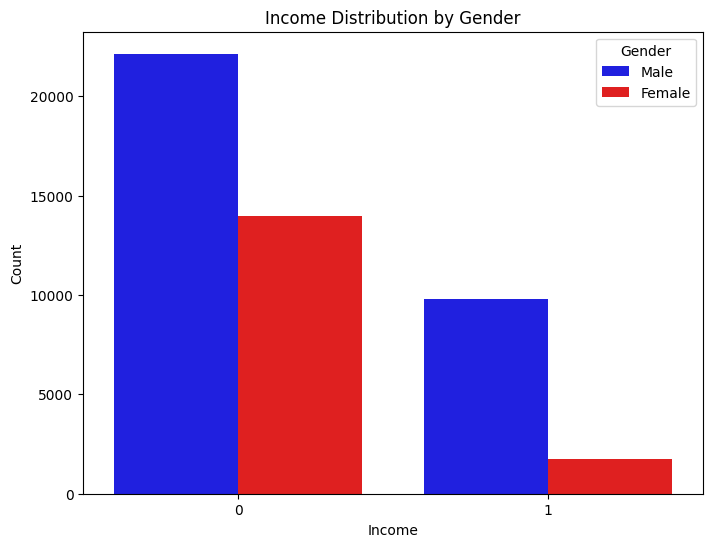

In [82]:
plt.figure(figsize=(6, 5))

# Count plot for gender distribution
sns.countplot(data=df, x='sex', palette={'Male': 'blue', 'Female': 'red'})

# Add labels and title
plt.title('Gender Distribution in the Dataset')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show the plot
plt.show()

# Set the figure size
plt.figure(figsize=(8, 6))

# Create a count plot showing income distribution by gender
sns.countplot(data=df, x='income', hue='sex', palette={'Male': 'blue', 'Female': 'red'})

# Add labels and title
plt.title('Income Distribution by Gender')
plt.xlabel('Income')
plt.ylabel('Count')
plt.legend(title='Gender')

# Show the plot
plt.show()

#few women compared to men who earn a higher income

We can see that the data collected had more males than females making the income across genders not good to use to make assumptions or hypotheses.

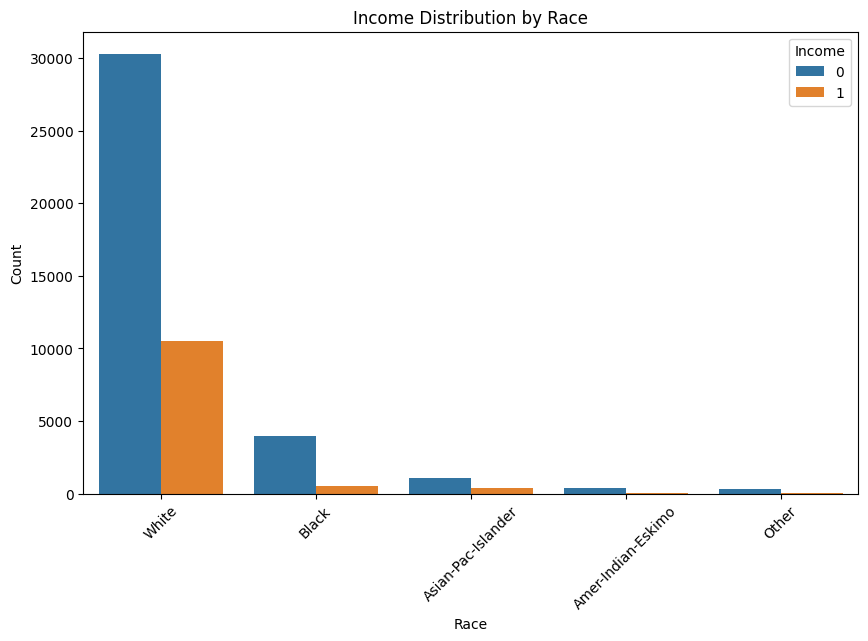

In [83]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='race', hue='income', order=df['race'].value_counts().index)
plt.title('Income Distribution by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Income')
plt.xticks(rotation=45)
plt.show()




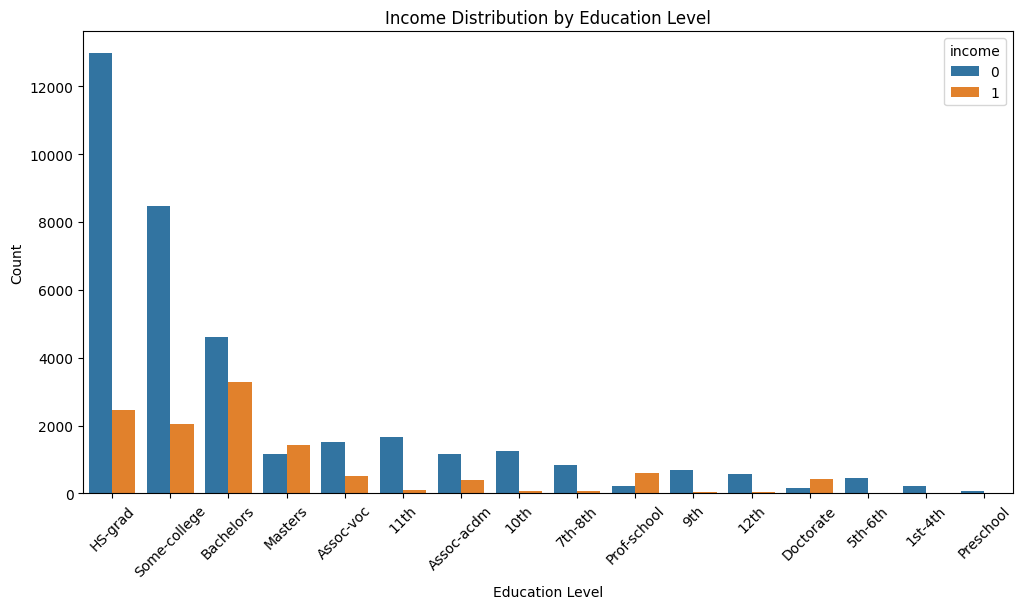

In [84]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='education', hue='income', order=df['education'].value_counts().index)

plt.title('Income Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

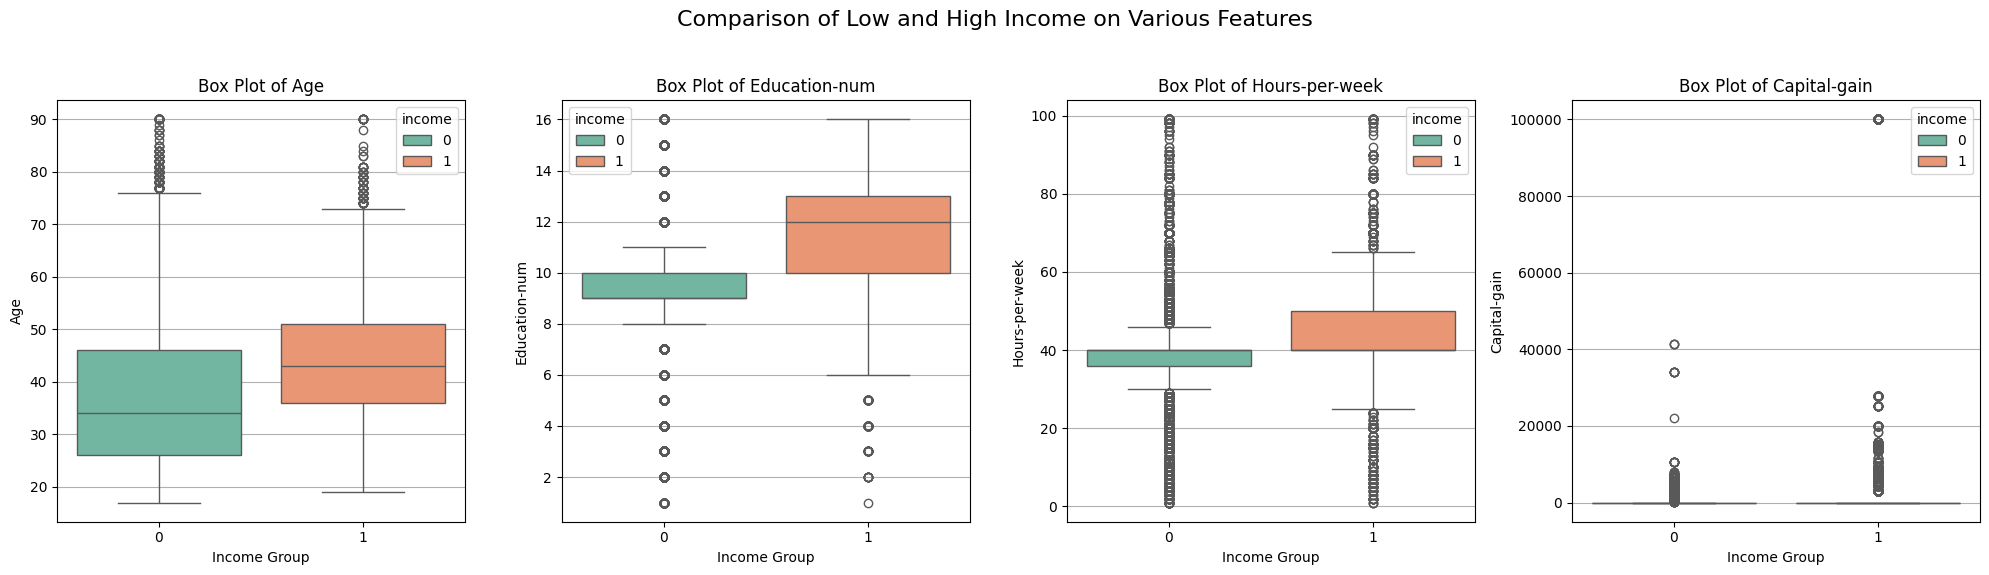

In [92]:
numeric_features = ['age', 'education-num', 'hours-per-week']

# Filter the data for low and high income groups
low_income = df[df['income'] == '<=50K']
high_income = df[df['income'] == '>50K']

# Set up the figure and axes for subplots
fig, axs = plt.subplots(nrows=1, ncols=len(numeric_features), figsize=(20, 6))
fig.suptitle('Comparison of Low and High Income on Various Features', fontsize=16)

# Plot boxplots for each numeric feature
for i, feature in enumerate(numeric_features):
    sns.boxplot(x='income', y=feature, data=df, ax=axs[i], palette='Set2', hue='income', dodge=False)
    axs[i].set_title(f'Box Plot of {feature.capitalize()}')
    axs[i].set_xlabel('Income Group')
    axs[i].set_ylabel(feature.capitalize())
    axs[i].grid(axis='y')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

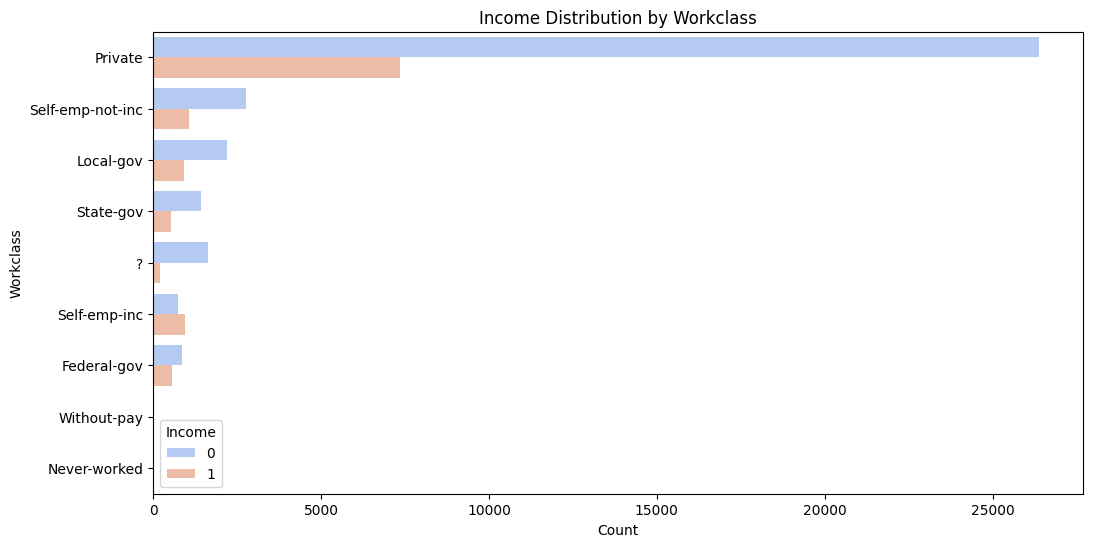

In [101]:
plt.figure(figsize=(12, 6))
sns.countplot(y=df['workclass'], hue=df['income'], order=df['workclass'].value_counts().index, palette='coolwarm')
plt.title('Income Distribution by Workclass')
plt.xlabel('Count')
plt.ylabel('Workclass')
plt.legend(title='Income')
plt.show()

<ipython-input-108-ee60336f35c5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='income', y='education-num', data=df, errorbar=None, ax=axs[0, 0], palette='viridis')
<ipython-input-108-ee60336f35c5>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 0].set_xticklabels(['Low Income', 'High Income'])
<ipython-input-108-ee60336f35c5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='income', y='hours-per-week', data=df, errorbar=None, ax=axs[0, 1], palette='coolwarm')
<ipython-input-108-ee60336f35c5>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_

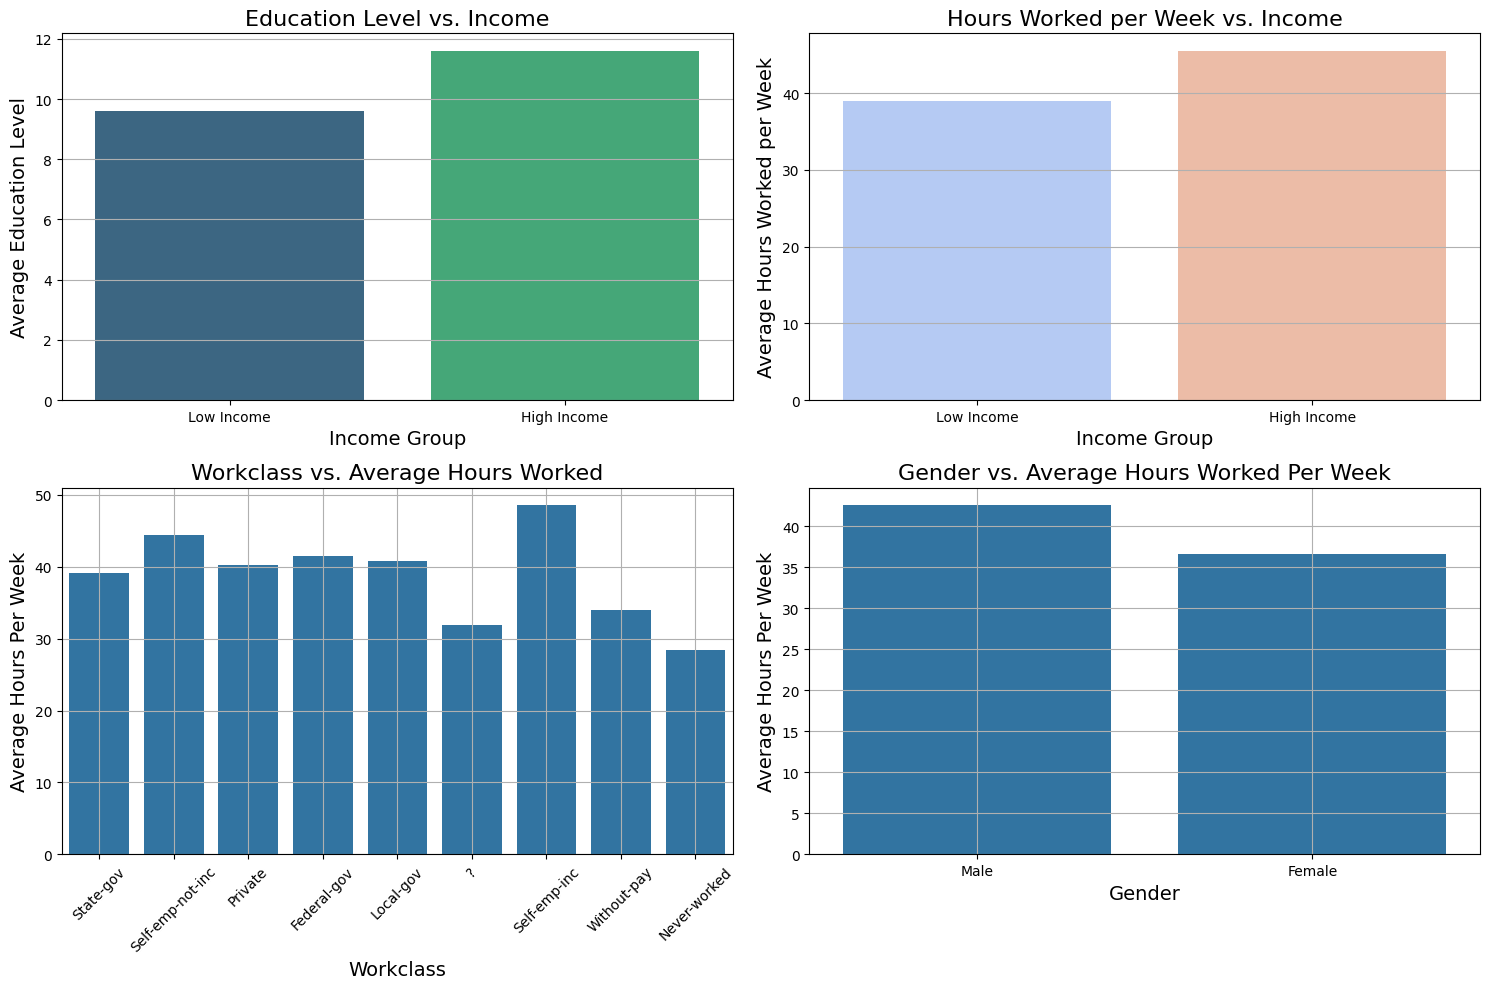

In [108]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Education Level vs. Income
sns.barplot(x='income', y='education-num', data=df, errorbar=None, ax=axs[0, 0], palette='viridis')
axs[0, 0].set_title('Education Level vs. Income', fontsize=16)
axs[0, 0].set_xlabel('Income Group', fontsize=14)
axs[0, 0].set_ylabel('Average Education Level', fontsize=14)
axs[0, 0].set_xticklabels(['Low Income', 'High Income'])
axs[0, 0].grid(axis='y')

sns.barplot(x='income', y='hours-per-week', data=df, errorbar=None, ax=axs[0, 1], palette='coolwarm')
axs[0, 1].set_title('Hours Worked per Week vs. Income', fontsize=16)
axs[0, 1].set_xlabel('Income Group', fontsize=14)
axs[0, 1].set_ylabel('Average Hours Worked per Week', fontsize=14)
axs[0, 1].set_xticklabels(['Low Income', 'High Income'])
axs[0, 1].grid(axis='y')

sns.barplot(x='workclass', y='hours-per-week', data=df, errorbar=None, ax=axs[1, 0])
axs[1, 0].set_title("Workclass vs. Average Hours Worked", fontsize=16)
axs[1, 0].set_xlabel("Workclass", fontsize=14)
axs[1, 0].set_ylabel('Average Hours Per Week', fontsize=14)
axs[1, 0].tick_params(axis='x', rotation=45)  # Rotate labels for readability
axs[1, 0].grid()

sns.barplot(x='sex', y='hours-per-week', data=df, errorbar=None, ax=axs[1, 1])
axs[1, 1].set_title('Gender vs. Average Hours Worked Per Week', fontsize=16)
axs[1, 1].set_xlabel('Gender', fontsize=14)
axs[1, 1].set_ylabel('Average Hours Per Week', fontsize=14)
axs[1, 1].grid()

plt.tight_layout()
plt.show()


# Hypothesis Formulation

Hypothesis 1

People with higher education levels have a higher income

Hypothesis 2

People who have a larger education num work more hours a week

##Hypothesis 1 test



*   People with higher education levels have a higher income



<ipython-input-122-7988a9bafc20>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y='education-num', data=df, palette='Set2')


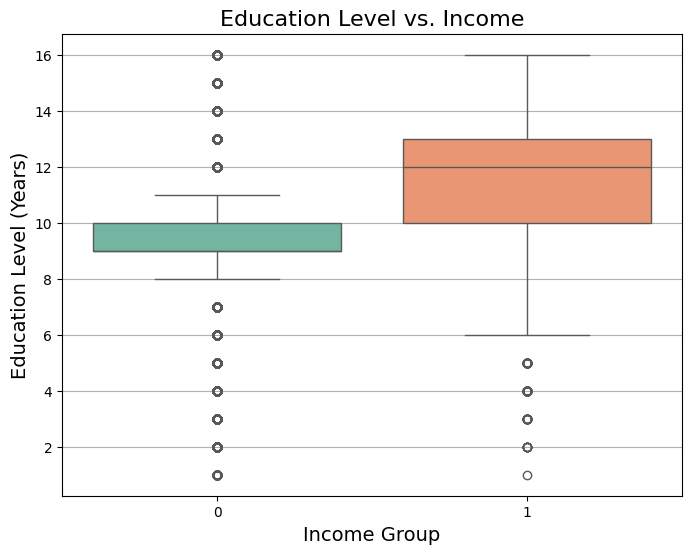

In [122]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='income', y='education-num', data=df, palette='Set2')

# Title and labels
plt.title('Education Level vs. Income', fontsize=16)
plt.xlabel('Income Group', fontsize=14)
plt.ylabel('Education Level (Years)', fontsize=14)
plt.grid(axis='y')

# Show plot
plt.show()

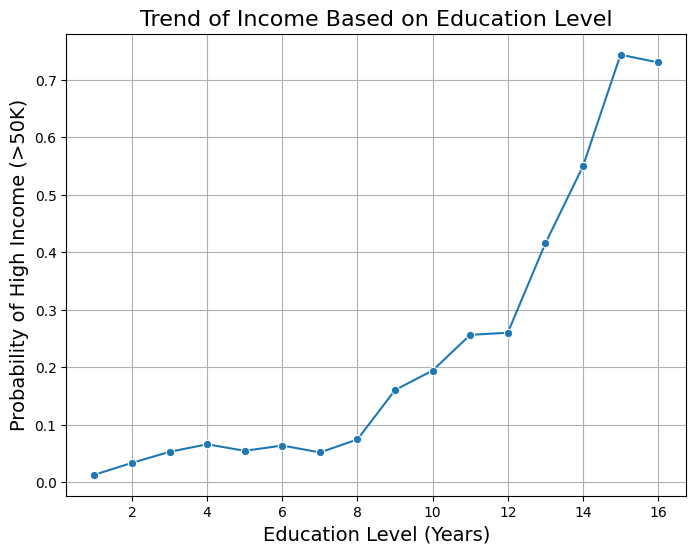

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute mean income for each education level
edu_income = df.groupby('education-num')['income'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.lineplot(data=edu_income, x='education-num', y='income', marker='o')

plt.title('Trend of Income Based on Education Level', fontsize=16)
plt.xlabel('Education Level (Years)', fontsize=14)
plt.ylabel('Probability of High Income (>50K)', fontsize=14)
plt.grid()

plt.show()

Using a point biserial test because income is binary while education level is discrete values from 1-16

In [123]:
from scipy.stats import pointbiserialr

# Perform the Point-Biserial Correlation Test
corr, p_value = pointbiserialr(df['education-num'], df['income'])

print(f"Point-Biserial Correlation: {corr}, p-value: {p_value}")

#Perform T test
low_income = df[df['income'] == 0]['education-num']
high_income = df[df['income'] == 1]['education-num']

t_stat, p_value = ttest_ind(low_income, high_income, equal_var=False)

# Output the results
print(f"T-test Statistic: {t_stat}, p-value: {p_value}")

Point-Biserial Correlation: 0.33284525777397156, p-value: 0.0
T-test Statistic: -77.96430536267674, p-value: 0.0


##Results and Analysis of Hypothesis test 1

###Hypotheses

**Null Hypothesis (H0):** There is no relationship between education number and income  

* If there is no connection the point bisserial coefficient should be close to 0




**Alternative Hypothesis (HA)**: There is a positive relationship between the number of failures and final grades.

* The point bisserial coefficient > 0



###Results

*   **The box plot**

This visual suggests that people who have a higher income have a greater mean of education years than lower income

*  **Point Biserial correlation** = 0.33284525777397156  

This positive correlation indicates a moderate positive correlation with the years of education and income earned by an adult

*  **Point Biserial p value** = 0

The number is 0 due to the fact that income is a binary value of 0 being low income less than or equal to 50k and 1 being high income. This p < 0.05 which suggests that the statistic is significant allowing us to reject the null hypothesis.

*  **T test correlation** = -77.96430536267674

The negative sign means the group coded as 0 (low income) has a lower mean education level compared to the group coded as 1 (high income). This large value is extremely large in maginitude which suggests some outliers.

*  **T test p value** = 0

This value is is less than 0.05 which indicates that we can reject the null hypothesis.








###Hypothesis one conclusion

There is a significant positive correlation between education level and income.

Individuals with higher levels of education are more likely to have a higher income, supporting the alternative hypothesis (HA).

##Hypothesis 2 test





*   People who have a larger education num work more hours a week





<ipython-input-132-391ee318586e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='education-num', y='hours-per-week', data=edu_work_avg, palette='Blues', legend=False)


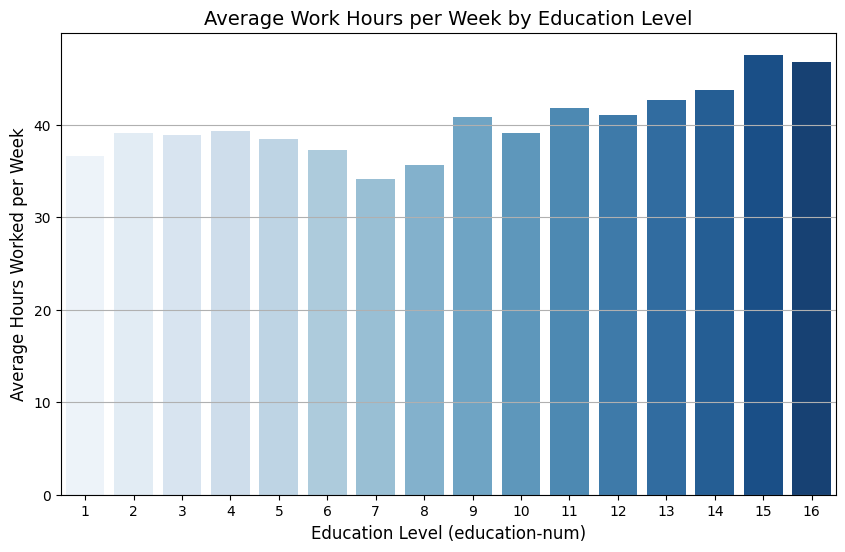

In [132]:
edu_work_avg = df.groupby('education-num', as_index=False)['hours-per-week'].mean()

# Creating the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='education-num', y='hours-per-week', data=edu_work_avg, palette='Blues', legend=False)

# Titles and labels
plt.title('Average Work Hours per Week by Education Level', fontsize=14)
plt.xlabel('Education Level (education-num)', fontsize=12)
plt.ylabel('Average Hours Worked per Week', fontsize=12)
plt.grid(axis='y')

# Show plot
plt.show()

In [131]:

from scipy.stats import spearmanr, ttest_ind

# Spearman correlation
correlation, p_value = spearmanr(df['education-num'], df['hours-per-week'])
print(f'Spearman Correlation: {correlation}, p-value: {p_value}')



Spearman Correlation: 0.16483659691419064, p-value: 3.1609192444002566e-287


###Hypotheses

**Null Hypothesis (H0):** There is no relationship between education number and hours worked per week.

* The average hours worked per week are the same regardless of education level




**Alternative Hypothesis (HA)**: There is a positive relationship between education level and hours worked per week

* The average hours worked per week are larger for higher education levels/higher education num.


###Results

*   **The bar plot**

This visual suggests that people who have a greater education level work more hours per week

*  **Spearman Test Coefficient** = 0.16483659691419064  

This positive correlation indicates a  very small positive correlation with the years of education and hours worked per week

*  **Spearman p value** = 3.1609192444002566e-287

The number is very small and way less than 0.05 which is signifciant to reject the null hypothesis and show that people with a higher education level work mroe per week



###Hypothesis two conclusion

There is a significant positive correlation between education level and hours worked.

Individuals with higher levels of education are more likely to work for longer per week, supporting the alternative hypothesis (HA).